In [1]:
import os
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

data_dir = '/content/content/MyDrive/data'

drive.mount('content')
os.chdir(data_dir)
os.listdir()

Mounted at content


['train.csv',
 'feature_details_analysis.xlsx',
 'data_description.txt',
 'feature_classification.csv',
 'train_refined - Copy.csv',
 'feature_classification - Copy.csv',
 'train_refined.csv',
 'train_refined - Copy (2).csv',
 'train_refined_numeric.csv']

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# __Introduction to Scikit-learn__
- Python's powerful libraries simplify machine learning; Scikit-learn is among the most user-friendly tools.  
- Scikit-learn supports tasks like classification, regression, clustering, and dimensionality reduction with ease.  
- It provides built-in datasets, tools for train-test splits, and efficient model evaluation methods.  
- Pipelines in Scikit-learn streamline workflows by automating preprocessing, feature selection, and model training.  
- Import the __sklearn__ module early in your notebook to maintain a clear, organized workflow.  

In [3]:
!pip list | grep scikit-learn

scikit-learn                          1.6.1


# __Dataset split in train and test__
- Start exploring Scikit-learn by splitting data into training and testing sets for evaluation.  
- Use train test split method from Scikit-learn, imported through sublibrary model selection.  
- Train test split divides the data into four parts for features and target values.  
- Exclude unnecessary columns like IDs and reserve 20 percent of data for testing.  
- Setting random state ensures consistent data shuffling for reproducibility and troubleshooting.  

In [4]:
df_dataset = pd.read_csv('train_refined_numeric.csv')
df_dataset.drop(columns='SalePrice_pred', inplace=True)
df_dataset.shape

(1459, 29)

In [5]:
df_dataset.iloc[:,:-1].head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,65.0,8450,7,2003,2003,196.0,4,5,4.0,706,...,2,1,3,1,4,0,2,548,0,61
1,80.0,9600,6,1976,1976,0.0,3,2,4.0,978,...,2,0,3,1,3,1,2,460,298,0
2,68.0,11250,7,2001,2002,162.0,4,5,4.0,486,...,2,1,3,1,4,1,2,608,0,42
3,60.0,9550,7,1915,1970,0.0,3,3,3.0,216,...,1,0,3,1,4,1,3,642,0,35
4,84.0,14260,8,2000,2000,350.0,4,5,4.0,655,...,2,1,4,1,4,1,3,836,192,84


In [6]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    df_dataset.iloc[:, :-1],  # Features (X)
    df_dataset.iloc[:, -1],  # Target (y)
    test_size=0.2,
    random_state=42
)

In [7]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1167, 28)
Shape of X_test: (292, 28)
Shape of y_train: (1167,)
Shape of y_test: (292,)


# __Data scaling with sklearn__
- Scaling ensures all features have comparable ranges, improving machine learning model performance.  
- StandardScaler standardizes features with mean 0 and standard deviation 1 for consistency.  
- Scikit Learn transforms scaled data into NumPy arrays for efficient mathematical calculations.  
- Reshape with -1 and 1 converts one dimensional arrays into proper two dimensional vectors.  
- Values extract raw data from pandas Series, converting it into compatible NumPy arrays.  
- Train test split outputs one dimensional arrays requiring reshape for Scikit Learn operations.


In [8]:
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

In [9]:
# Check the data type of the transformed data
print("Type of X_train_scaled:", type(X_train_scaled))
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Num of dimensions of X_train_scaled:", X_train_scaled.ndim)
print("Sample of X_train_scaled:\n", X_train_scaled[:5])

Type of X_train_scaled: <class 'numpy.ndarray'>
Shape of X_train_scaled: (1167, 28)
Num of dimensions of X_train_scaled: 2
Sample of X_train_scaled:
 [[ 0.01677362 -0.20736514 -0.79857349 -0.45714987 -1.32075853 -0.58049427
  -0.68340693 -0.99038339 -0.8693745   1.02516363 -0.40812794  0.56439281
  -1.17418392  0.26946297  0.29478123  0.38785999 -0.79690796 -0.38786136
  -1.03755118 -0.76341024  0.14992305 -0.22562317 -0.7575904  -0.94818207
  -1.02556099 -0.83734653  1.26192936 -0.7103677 ]
 [ 0.48845603  0.33856628  0.64628738  0.81563792  0.59643185 -0.58049427
   1.03913279  1.064941    2.0756474   1.6266223  -1.05350403  0.54630086
   0.90198674  0.26946297  0.29478123  0.36716372  1.38955492  1.41825372
   0.79702795  1.22965407  0.14992305 -0.22562317  0.74089773 -0.94818207
   0.30572897  0.28207883  1.62962964 -0.07158166]
 [ 0.1111101  -0.18396808  0.64628738  1.17462935  1.1236592  -0.58049427
   1.03913279  1.064941    2.0756474  -0.96245246  1.7955953   0.69555943
   0.901

In [10]:
y_train.shape

(1167,)

In [11]:
y_train.ndim

1

In [12]:
y_test.shape

(292,)

In [13]:
y_test.ndim

1

In [14]:
y_train.values.reshape(-1, 1).shape

(1167, 1)

In [15]:
y_train.values.reshape(-1, 1).ndim

2

In [16]:
y_train_scaled.shape

(1167, 1)

In [17]:
y_train_scaled.ndim

2

In [18]:
y_test_scaled.shape

(292, 1)

In [19]:
y_test_scaled.ndim

2

In [20]:
X_train_scaled.shape

(1167, 28)

In [21]:
X_train_scaled.ndim

2

In [22]:
# Check the data type and shape of X_test_scaled
print("Type of X_test_scaled:", type(X_test_scaled))
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Num of Dimensions of X_test_scaled:", X_test_scaled.ndim)
print("Sample of X_test_scaled:\n", X_test_scaled[:5])



Type of X_test_scaled: <class 'numpy.ndarray'>
Shape of X_test_scaled: (292, 28)
Num of Dimensions of X_test_scaled: 2
Sample of X_test_scaled:
 [[-0.03039462 -0.38021093 -2.24343436 -0.71823455 -1.65626685 -0.58049427
  -0.68340693 -0.99038339  0.60313645 -0.96245246 -1.28961724 -2.40720963
  -1.17418392 -3.711085    0.29478123 -1.1488381  -0.79690796 -1.52193361
  -1.03755118 -0.76341024 -1.08219101 -0.22562317 -0.7575904  -0.94818207
  -1.02556099 -0.87013305 -0.73644169 -0.7103677 ]
 [ 0.96013843 -0.23661147 -0.79857349 -0.75087013 -0.55388238 -0.58049427
  -0.68340693 -0.30527526 -0.8693745  -0.23380361  1.45604203  1.11845871
  -0.13609859  0.26946297  0.29478123  1.02168328 -0.79690796  0.07989572
  -1.03755118 -0.76341024 -1.08219101 -0.22562317 -0.7575904  -0.94818207
   0.30572897  1.58885572 -0.73644169  0.97370459]
 [-0.64358174 -0.152772   -0.79857349 -1.4362174  -1.65626685 -0.58049427
  -0.68340693 -0.99038339 -0.8693745  -0.96245246  0.97706953 -0.1276242
  -0.13609859 

In [23]:
# Check the data type and shape of y_train_scaled
print("Type of y_train_scaled:", type(y_train_scaled))
print("Shape of y_train_scaled:", y_train_scaled.shape)
print("Num of dimensions of y_train_scaled:", y_train_scaled.ndim)
print("Sample of y_train_scaled:\n", y_train_scaled[:5])



Type of y_train_scaled: <class 'numpy.ndarray'>
Shape of y_train_scaled: (1167, 1)
Num of dimensions of y_train_scaled: 2
Sample of y_train_scaled:
 [[-0.44390953]
 [ 1.81922918]
 [ 0.86178547]
 [ 3.76082905]
 [-0.66651333]]


In [24]:
# Check the data type and shape of y_test_scaled
print("Type of y_test_scaled:", type(y_test_scaled))
print("Shape of y_test_scaled:", y_test_scaled.shape)
print("Num of dimensions of y_test_scaled:", y_test_scaled.ndim)
print("Sample of y_test_scaled:\n", y_test_scaled[:5])

Type of y_test_scaled: <class 'numpy.ndarray'>
Shape of y_test_scaled: (292, 1)
Num of dimensions of y_test_scaled: 2
Sample of y_test_scaled:
 [[-1.34050819]
 [-0.33879106]
 [-0.81491587]
 [-0.27077323]
 [-1.19828909]]


# __Arrays comparison__
- Scale back standardized values and compare them with actual values to ensure accuracy.  
- __np.allclose__ compares arrays element-wise within a specified tolerance for precision.  
- Parameter __atol__ sets acceptable thresholds for floating-point inaccuracies during array comparison.  
- Minor discrepancies are ignored, confirming scaling accuracy between y_train and y_test arrays.  

In [32]:
y_train_scaled_back = target_scaler.inverse_transform(y_train_scaled)
print(y_train_scaled_back[:5])
print(y_train.head())

[[145000.]
 [328000.]
 [250580.]
 [485000.]
 [127000.]]
254     145000
1065    328000
864     250580
798     485000
380     127000
Name: SalePrice, dtype: int64


In [33]:
y_train_scaled_back = target_scaler.inverse_transform(y_train_scaled)
np.allclose(y_train_scaled_back.flatten(), y_train, atol=1e-10)

True

In [34]:
y_test_scaled_back = target_scaler.inverse_transform(y_test_scaled)
np.allclose(y_test_scaled_back.flatten(), y_test, atol=1e-10)

True

# __Regression analysis for single variable__
- Import LinearRegression from Scikit Learn's linear model sub-library to simplify implementation.  
- Identify GrLivArea's index using pandas method get_loc to locate the feature position.  
- Extract GrLivArea column from NumPy array and store it for scaled feature operations.  
- Use reshape with -1 and 1 to convert one dimensional data into a two dimensional vector.  
- Fit the model with X train grlivarea and y train scaled to minimize error M S E.  
- Scale predictions back to original values using inverse transform and display SalePrice dataframe.


In [35]:
# Assuming `df` is your original pandas DataFrame
grlivarea_index = X_train.columns.get_loc('GrLivArea')
print("Index of GrLivArea:", grlivarea_index)

Index of GrLivArea: 17


In [36]:
X_train_grlivarea = X_train_scaled[:, grlivarea_index]
X_train_grlivarea[:5]

array([-0.38786136,  1.41825372, -0.27712703,  3.09836076,  0.33191178])

In [37]:
X_train_grlivarea.shape

(1167,)

In [38]:
X_train_grlivarea.ndim

1

In [39]:
# Reshape X_train_grlivarea to 2D
X_train_grlivarea1 = X_train_grlivarea.reshape(-1, 1)

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model with training data
model.fit(X_train_grlivarea1, y_train_scaled)

# Display the slope (coefficient) and intercept of the regression line
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_[0])

# Make predictions using the trained model
y_pred = model.predict(X_train_grlivarea1)

# Display some predictions
print("Sample Predictions:\n", y_pred[:5])

Coefficient (Slope): [0.70082168]
Intercept: -2.6006146570395705e-16
Sample Predictions:
 [[-0.27182165]
 [ 0.99394295]
 [-0.19421663]
 [ 2.17139839]
 [ 0.23261097]]


In [40]:
y_pred_original = target_scaler.inverse_transform(y_pred)
df_target = pd.DataFrame({'SalePrice':y_train, 'SalePrice_pred':y_pred_original.flatten().astype('int')})
df_target.head()

,SalePrice,SalePrice_pred
254,145000,158915
1065,328000,261266
864,250580,165190
798,485000,356476
380,127000,199704


# __Shape of the vector__
- Predictions are created as one-column matrices with multiple rows and one feature column.  
- After scaling back, the column matrix retains its shape, remaining a two-dimensional array.  
- To store these vectors in pandas, they must first be converted into one-dimensional arrays.  
- The flatten method simplifies the column matrix into a one-dimensional array for compatibility.  
- With practice, understanding these shape changes becomes intuitive, aiding further machine learning tasks.  


In [41]:
y_pred.shape

(1167, 1)

In [42]:
y_pred_original.shape

(1167, 1)

In [43]:
y_pred_original.flatten().shape

(1167,)

In [44]:
y_pred_original.ndim

2

In [45]:
y_pred_original.flatten().ndim

1

# Multivariable linear regression
- Utilize Scikit-Learn to perform multivariable regression and reapply data scaling for accuracy.  
- Apply regression with selected features and compare actual and predicted training data values.  
- Predict outcomes on unseen test data to evaluate model performance and generalization.  
- Use Pandas concat to combine DataFrames horizontally, creating a unified dataset for processing.  

In [53]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    df_dataset.iloc[:, :-1],  # Features (X)
    df_dataset.iloc[:, -1],  # Target (y)
    test_size=0.2,
    random_state=42
)

In [54]:
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

In [55]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = model.predict(X_train_scaled)
y_pred = target_scaler.inverse_transform(y_pred_scaled).flatten().astype('int')
act_vs_pred_train = pd.DataFrame({'SalePrice':y_train, 'SalePrice_pred': y_pred})
act_vs_pred_train.head()

,SalePrice,SalePrice_pred
254,145000,133544
1065,328000,276845
864,250580,210453
798,485000,397821
380,127000,145989


In [56]:
y_test_pred_scaled = model.predict(X_test_scaled)
y_test_pred = target_scaler.inverse_transform(y_test_pred_scaled).flatten().astype('int')
act_vs_pred_test = pd.DataFrame({'SalePrice':y_test, 'SalePrice_pred': y_test_pred})
act_vs_pred_test.head()

,SalePrice,SalePrice_pred
1321,72500,60017
836,153500,148362
413,115000,119049
522,159000,165983
1035,84000,87917


In [57]:
def linear_regression(data, learning_rate=0.1, training_iter=100, w_initail=-50.0, verbose=False):
    """
    Performs linear regression using gradient descent and returns unscaled predictions (y_pred).

    This function applies gradient descent to find the optimal weights and bias
    for a given dataset. It includes feature scaling, dynamically tracks the
    history of weights, bias, and MSE during the training process, and calculates
    unscaled predictions using the best weights and bias.

    Parameters:
    data : pandas.DataFrame
        The input dataset containing features and the target column.
    learning_rate : float, optional (default=0.1)
        The step size used for updating weights and bias during gradient descent.
    training_iter : int, optional (default=100)
        The number of iterations to run the gradient descent process.

    Returns:
    tuple:
        - best_w : numpy.ndarray
            The best weights obtained at the iteration with the lowest MSE.
        - best_b : float
            The best bias obtained at the iteration with the lowest MSE.
        - best_mse : float
            The lowest Mean Squared Error achieved during training.
        - y_pred : numpy.ndarray
            The unscaled predictions based on the best weights and bias.
    """
    df_x = data.copy()

    # Reset DataFrame if 'y_pred' exists

    df_x = df_x.loc[:, ~df_x.columns.str.contains('_pred')]
    target = df_x.columns[-1]

    data_dim = df_x.shape

    # Feature scaling
    for col in df_x.columns:
        df_x[col + '_scaled'] = (df_x[col] - df_x[col].mean()) / df_x[col].std()

    w = np.full((data_dim[1] - 1), w_initail)

    if verbose:
        print(f'{w=}')

    b = 0

    w_history = np.zeros((training_iter, data_dim[1] - 1))  # Store weights (iterations, features)
    b_history = np.zeros(training_iter)  # Store bias values
    mse_history = np.zeros(training_iter)  # Store MSE values


    # Select columns with '_scaled' in their name except the last column
    features = df_x.columns[df_x.columns.str.contains('_scaled')][:-1]
    target_scaled = df_x.columns[df_x.columns.str.contains('_scaled')][-1]

    # Gradient descent
    for iteration in range(training_iter):

        df_x[target+'_pred_scaled'] = df_x[features].dot(w) + b  # Compute scaled predictions
        df_x['error'] = df_x[target+'_pred_scaled'] - df_x[target+'_scaled']  # Compute error

        w_gradients = 2 * df_x['error'].dot(df_x[features].values) / data_dim[0]
        b_gradients = 2 * df_x['error'].mean()

        # Update weights and bias
        w -= learning_rate * w_gradients
        b -= learning_rate * b_gradients
        mse = (df_x['error'] ** 2).mean()

        if verbose:
            print(f"{df_x[['error',target+'_pred_scaled']].head()=}")
            print(f'{w_gradients=}')
            print(f'{b_gradients=}')
            print(f'{w=}')
            print(f'{b=}')
            print(f'{mse=}')

        w_history[iteration] = w
        b_history[iteration] = b
        mse_history[iteration] = mse

    # Find best parameters
    best_index = np.argmin(mse_history)
    best_w = w_history[best_index]
    best_b = b_history[best_index]
    best_mse = mse_history[best_index]

    # Compute scaled predictions for the target variable
    df_x[target+'_pred_scaled'] = df_x[features].dot(best_w) + best_b

    # Compute unscaled predictions
    y_mean = data[target].mean()  # Mean of original target column
    y_std = data[target].std()    # Standard deviation of original target column
    y_pred = ((df_x[target+'_pred_scaled'] * y_std) + y_mean).astype('int')  # Unscale predictions as int

    if verbose:
        print(df_x.head())


    return best_w, best_b, best_mse, y_pred

# best_w, best_b, best_mse, y_pred = linear_regression(df_dataset[['GrLivArea','SalePrice']] , training_iter=200)
best_w, best_b, best_mse, y_pred_manual = linear_regression(pd.concat([X_train, y_train],axis=1) , training_iter=200)
pd.concat([y_train,y_pred_manual], axis=1).head()

,SalePrice,SalePrice_pred_scaled
254,145000,57502
1065,328000,233450
864,250580,201859
798,485000,432907
380,127000,121921


In [58]:
best_w, best_b, best_mse, y_test_pred_manual = linear_regression(pd.concat([X_test, y_test], axis=1), training_iter=200)
pd.concat([y_test,y_test_pred_manual], axis=1).head()

,SalePrice,SalePrice_pred_scaled
1321,72500,41440
836,153500,78288
413,115000,112884
522,159000,125316
1035,84000,95730


# __Result analysis__
- RMSE measures average variation between predicted and actual values; smaller values indicate better accuracy.  
- Normalized RMSE expresses error as a percentage of mean actual value; lower percentages are better.  
- Star star operator computes square roots efficiently, by raising numbers to the power of 1 over two.  
- Descriptive statistics analyze residuals, revealing detailed insights into prediction errors and data distribution.  
- Visualization confirms scikit-learn's Linear Regression model outperforms manual methods in prediction accuracy.  

In [59]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_pred)
rmse = mse ** 0.5
mse_manual_model = mean_squared_error(y_test, y_test_pred_manual)
rmse_manual_model = mse_manual_model ** 0.5

normalized_rmse = rmse / y_test.mean()
normalize_rmse_manual_model = rmse_manual_model / y_test.mean()

residual = y_test - y_test_pred
residual_manual_model = y_test - y_test_pred_manual



# Convert RMSE values to integers
rmse = int(rmse)
rmse_manual_model = int(rmse_manual_model)

# Convert normalized RMSE values to percentages
normalized_rmse = round(normalized_rmse * 100, 2)  # Two decimal places for %
normalize_rmse_manual_model = round(normalize_rmse_manual_model * 100, 2)

# Extract residual statistics into separate rows
residual_info = residual.describe().to_dict()
residual_manual_info = residual_manual_model.describe().to_dict()

# Create the DataFrame
results_df = pd.DataFrame({
    'LinearRegression': [
        rmse,
        normalized_rmse,
        residual_info['count'],
        residual_info['mean'],
        residual_info['std'],
        residual_info['min'],
        residual_info['25%'],
        residual_info['50%'],
        residual_info['75%'],
        residual_info['max']
    ],
    'Manual Model': [
        rmse_manual_model,
        normalize_rmse_manual_model,
        residual_manual_info['count'],
        residual_manual_info['mean'],
        residual_manual_info['std'],
        residual_manual_info['min'],
        residual_manual_info['25%'],
        residual_manual_info['50%'],
        residual_manual_info['75%'],
        residual_manual_info['max']
    ]
}, index=['RMSE', 'Normalized RMSE (%)', 'Residual Count', 'Residual Mean', 'Residual Std', 'Residual Min',
          'Residual 25%', 'Residual 50%', 'Residual 75%', 'Residual Max'])

# Display the DataFrame
print(results_df)


                     LinearRegression   Manual Model
RMSE                     25936.000000   90128.000000
Normalized RMSE (%)         14.320000      49.780000
Residual Count             292.000000     292.000000
Residual Mean             -713.873288       0.520548
Residual Std             25970.854064   90283.257533
Residual Min            -85367.000000 -608714.000000
Residual 25%            -16695.750000  -23104.250000
Residual 50%              -392.500000   10825.000000
Residual 75%             15468.500000   45519.500000
Residual Max             78970.000000  199592.000000


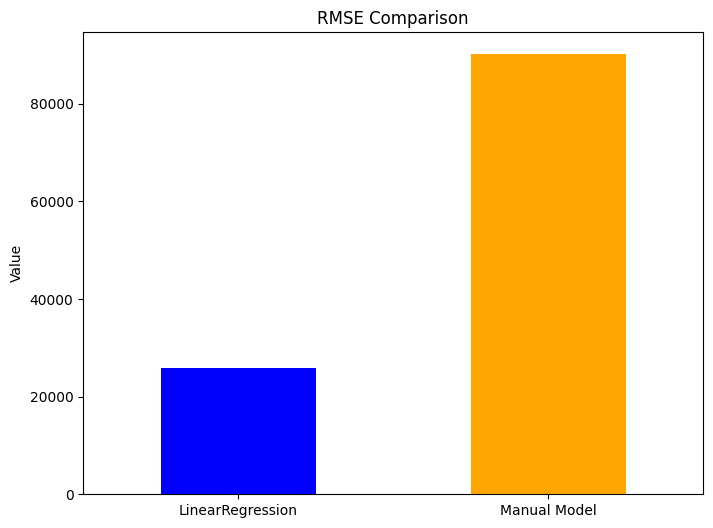

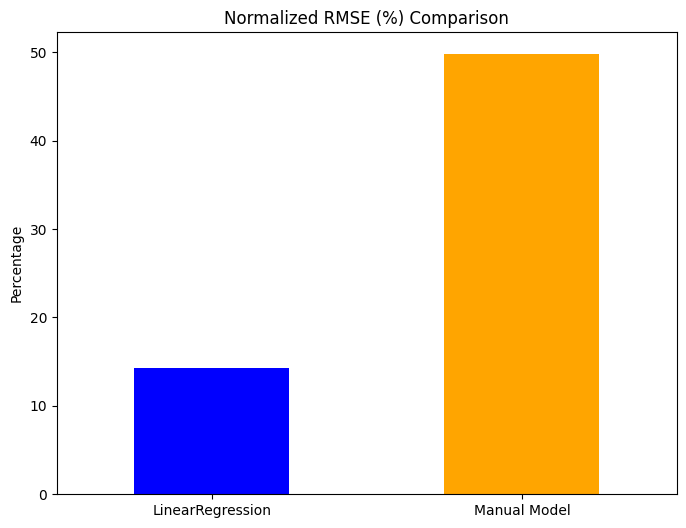

<Figure size 1200x800 with 0 Axes>

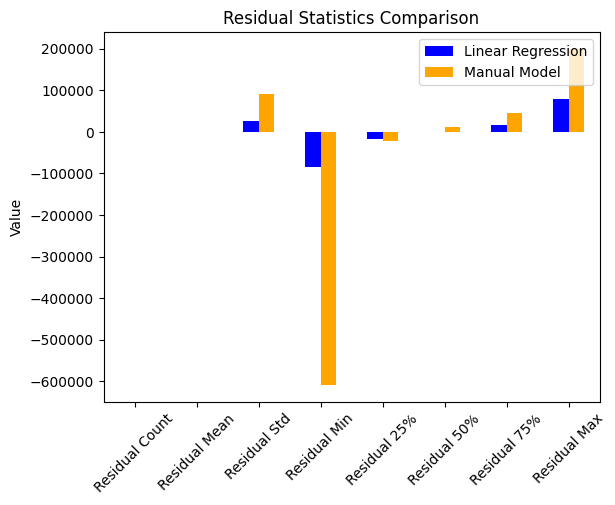

In [60]:
# Plot 1: RMSE Comparison
plt.figure(figsize=(8, 6))
results_df.loc['RMSE', :].plot(kind='bar', color=['blue', 'orange'])
plt.title('RMSE Comparison')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.show()

# Plot 2: Normalized RMSE Comparison
plt.figure(figsize=(8, 6))
results_df.loc['Normalized RMSE (%)', :].plot(kind='bar', color=['blue', 'orange'])
plt.title('Normalized RMSE (%) Comparison')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

# Plot 3: Residual Statistics Comparison
plt.figure(figsize=(12, 8))
results_df.loc[
    ['Residual Count', 'Residual Mean', 'Residual Std', 'Residual Min',
     'Residual 25%', 'Residual 50%', 'Residual 75%', 'Residual Max'], :
].plot(kind='bar', color=['blue', 'orange'])
plt.title('Residual Statistics Comparison')
plt.ylabel('Value')
plt.legend(['Linear Regression', 'Manual Model'], loc='upper right', fontsize=10)
plt.xticks(rotation=45)
plt.show()